<a href="https://colab.research.google.com/github/JasmineNag/Cardiovascular-Risk-Prediction/blob/main/Individual_EDA(Cardiovascular_Risk_Prediction)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CARDIOVASCULAR RISK PREDICTION**



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **GitHub Link -**

https://github.com/JasmineNag/Cardiovascular-Risk-Prediction.git

# **Problem Statement**


The ongoing cardiovascular study on residents of the town of Framingham, Massachusetts provides a dataset with over 4000 records and 15 attributes. The dataset aims to predict whether a patient has a 10-year risk of failure coronary heart disease(CHD). The 15 attributes contain potential risk factors that are both demographic, behavioral, and medical risk factors. The problem at hand is to develop a predictive model that can accurately classify patients as either high or low risk for CHD based on their demographic, behavioral, and medical risk factor attributes. The development of such a model could be useful in identifying patients who are at a higher risk of developing CHD and subsequently enabling physicians to take proactive measures to prevent or reduce the severity of the disease.

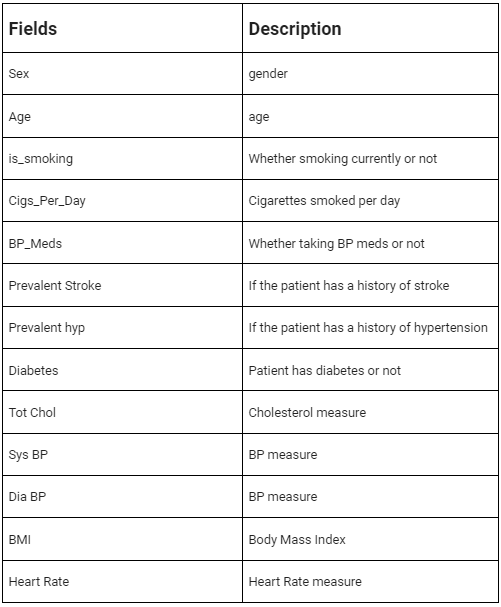


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [12]:
# Import Libraries
# For data visualisation
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from xgboost import XGBRFClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
!pip install scikit-learn
import sklearn
!pip install missingno
import missingno as msno
!pip install shap
import shap
shap.initjs()
!pip install scikit-plot
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [13]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:

# Load Dataset
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Project 3/data_cardiovascular_risk.csv")

### Dataset First View

In [15]:
# Dataset First Look
df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


### Dataset Rows & Columns count

In [16]:
# Dataset Rows & Columns count
print("The Cardiovascular Risk prediction Dataset has " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " columns.")      
          #Using concatenation and str() function

The Cardiovascular Risk prediction Dataset has 3390 rows and 17 columns.


### Dataset Information

In [17]:
# Dataset Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [18]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()                                    #This code will print the number of duplicate values in the dataset. 
print("Number of duplicate values in the dataset: ", duplicate_count)   


Number of duplicate values in the dataset:  0


#### Missing Values/Null Values

In [19]:
# Missing Values/Null Values Count
# 'df' is the DataFrame object
missing_values_count = df.isnull().sum()                                   #This code will print the number of missing values in each column of the dataset.
print("Number of missing values in the dataset:\n", missing_values_count)


Number of missing values in the dataset:
 id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


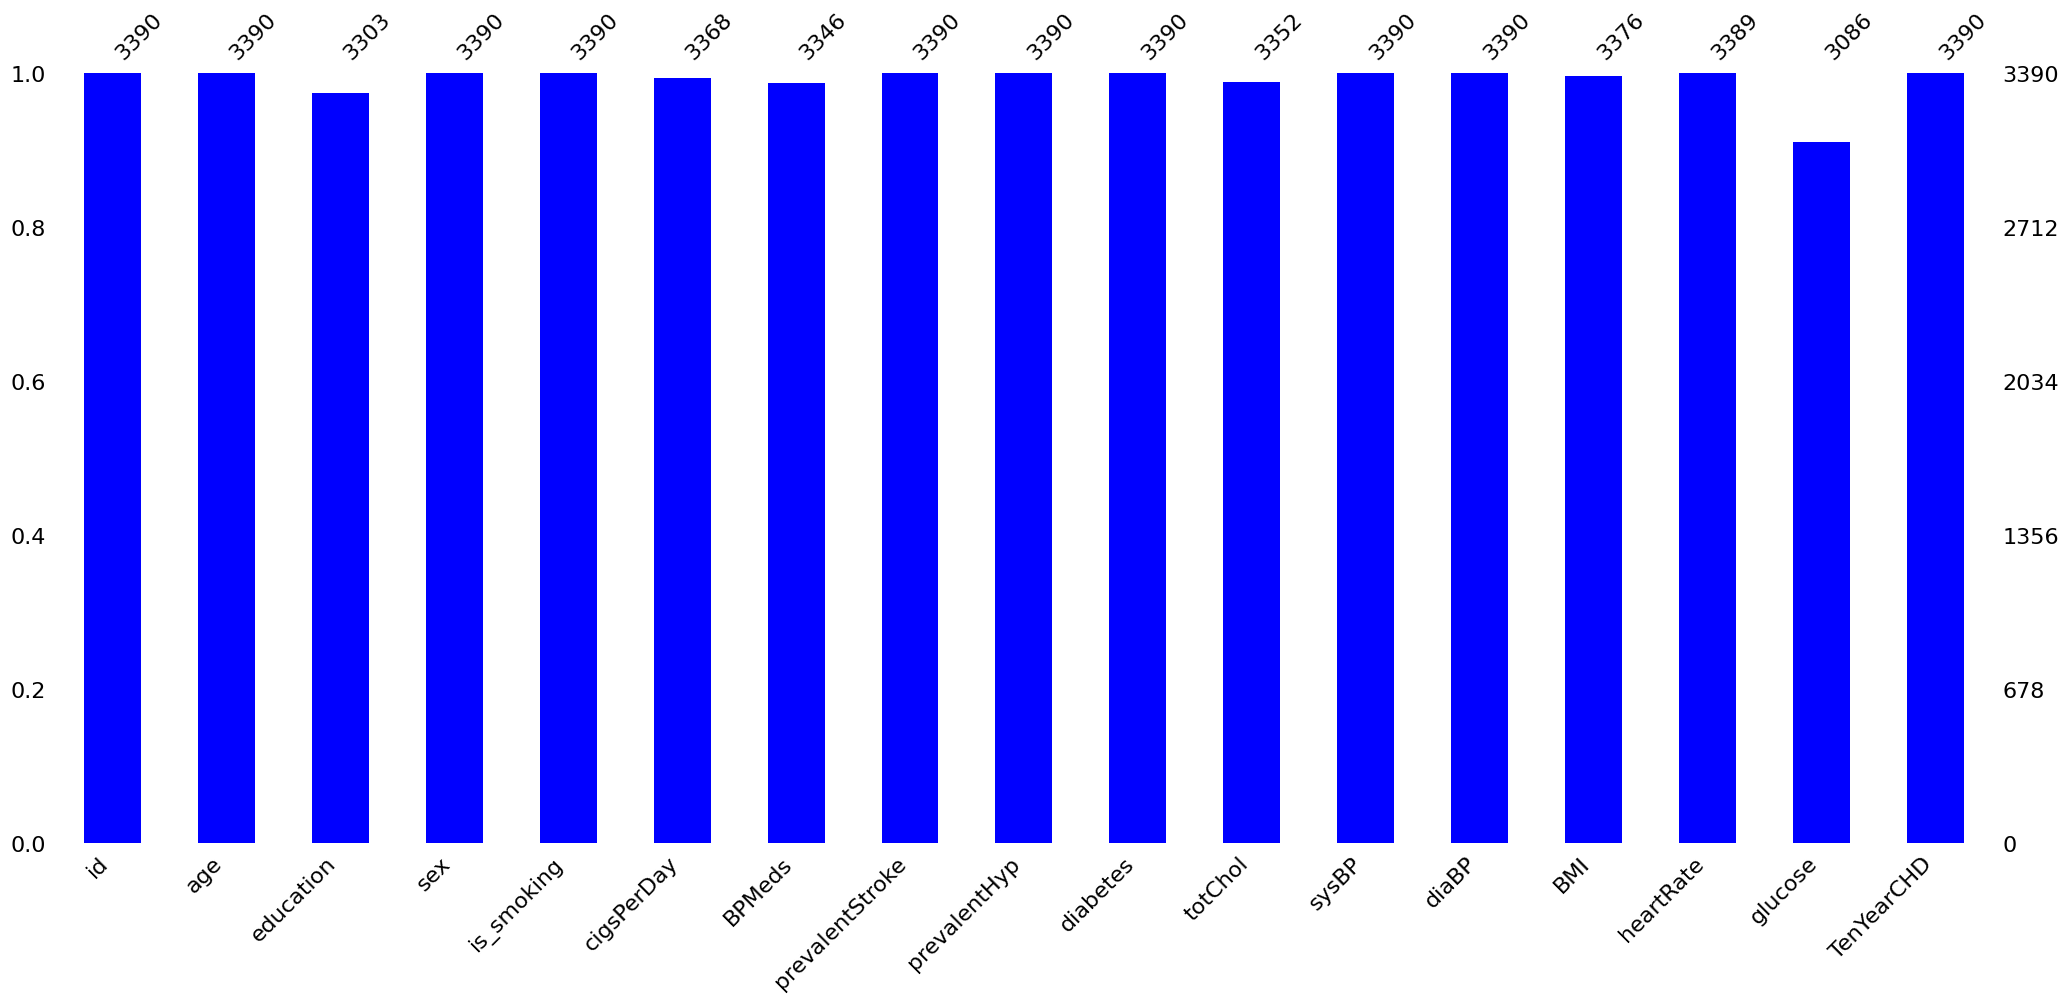

In [20]:
# Visualizing the missing values
msno.bar(df,color='b')
plt.show()


### What did you know about your dataset?



*  It contains 3390 rows and 17 columns.
*  Only two columns i.e sex and is_smoking are of Object datatype. Rest are of int and float datatypes.

*  There are no duplicate rows in our dataset.
*  The column "education" has 87 missing values, "cigsPerDay" has 22, "BPMeds" has 44, "totChol" has 38, "BMI" has 14, "heartRate" has 1, and "glucose" has 304 missing values.

The other columns, namely "id", "age", "sex", "is_smoking", "prevalentStroke", "prevalentHyp", "diabetes", "sysBP", "diaBP", and "TenYearCHD" have no missing values.










## ***2. Understanding Your Variables***

In [21]:
# Dataset Columns
columns_list = df.columns.tolist()                         #This code will print the list of columns in the dataset.                       
print("List of columns in the dataset:\n", columns_list)


List of columns in the dataset:
 ['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


In [22]:
# Dataset Describe
df.describe()                        
   #This code will print a summary of the dataset, including the count, mean, standard deviation, minimum, maximum, and percentiles for each numerical column.

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description 

**id :** A unique identifier for each individual

**age:** Age of the individual in years

**education:** Level of education of the individual (categorical variable)

**sex:**is_smoking: Whether the individual is a smoker or not (binary variable)

**cigsPerDay:** Number of cigarettes smoked per day (continuous variable)

**BPMeds:** Whether the individual is on blood pressure medication or not (binary variable)

**prevalentStroke:**Whether the individual has had a stroke in the past (binary variable)

**prevalentHyp:** Whether the individual has hypertension (high blood pressure) or not (binary variable)

**diabetes:** Whether the individual has diabetes or not (binary variable)

**totChol:** Total cholesterol levels of the individual (continuous variable)

**sysBP:** Systolic blood pressure of the individual (continuous variable)

**diaBP:** Diastolic blood pressure of the individual (continuous variable)

**BMI:** Body Mass Index of the individual (continuous variable)

**heartRate:**Heart rate of the individual (continuous variable)

**glucose:** Blood glucose level of the individual (continuous variable)

**TenYearCHD:** The 10-year risk of developing coronary heart disease for the individual (binary variable)

### Check Unique Values for each variable.

In [23]:
# Check Unique Values for each variable.
unique_values = df.nunique()                                 #This code will print the number of unique values for each column in the dataset.
print("Number of unique values in each column:\n", unique_values)


Number of unique values in each column:
 id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In order to impute the null values with the various statistical value (Mean, Median, Mode) we have to check the following things:

Distribution of data

Outliers in the data

In [24]:
# Dropping the first id column 
df=df.drop(['id'] , axis = 1)
     

In [25]:
# storing the features that contains null values in a separate list
null_list= ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']

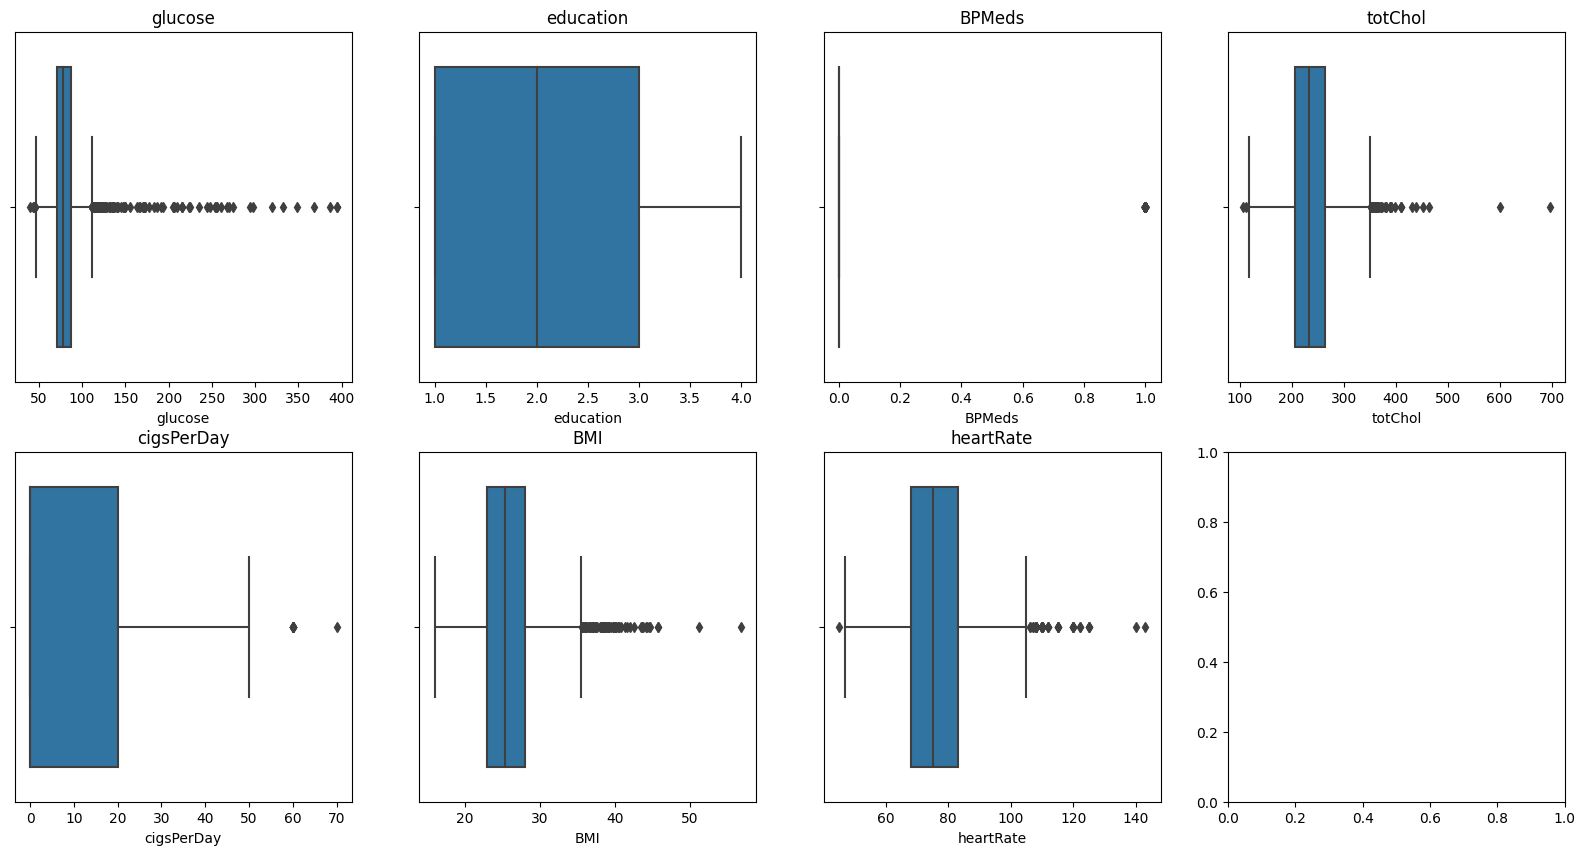

In [26]:
# Plotting the box plot and observe the outliers in the columns having null values
# Create figure with subplots
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Create box plots for columns with null values
for i, column in enumerate(null_list):
    sns.boxplot(x=df[column], ax=axs[i//4, i%4])
    axs[i//4, i%4].set_title(column)

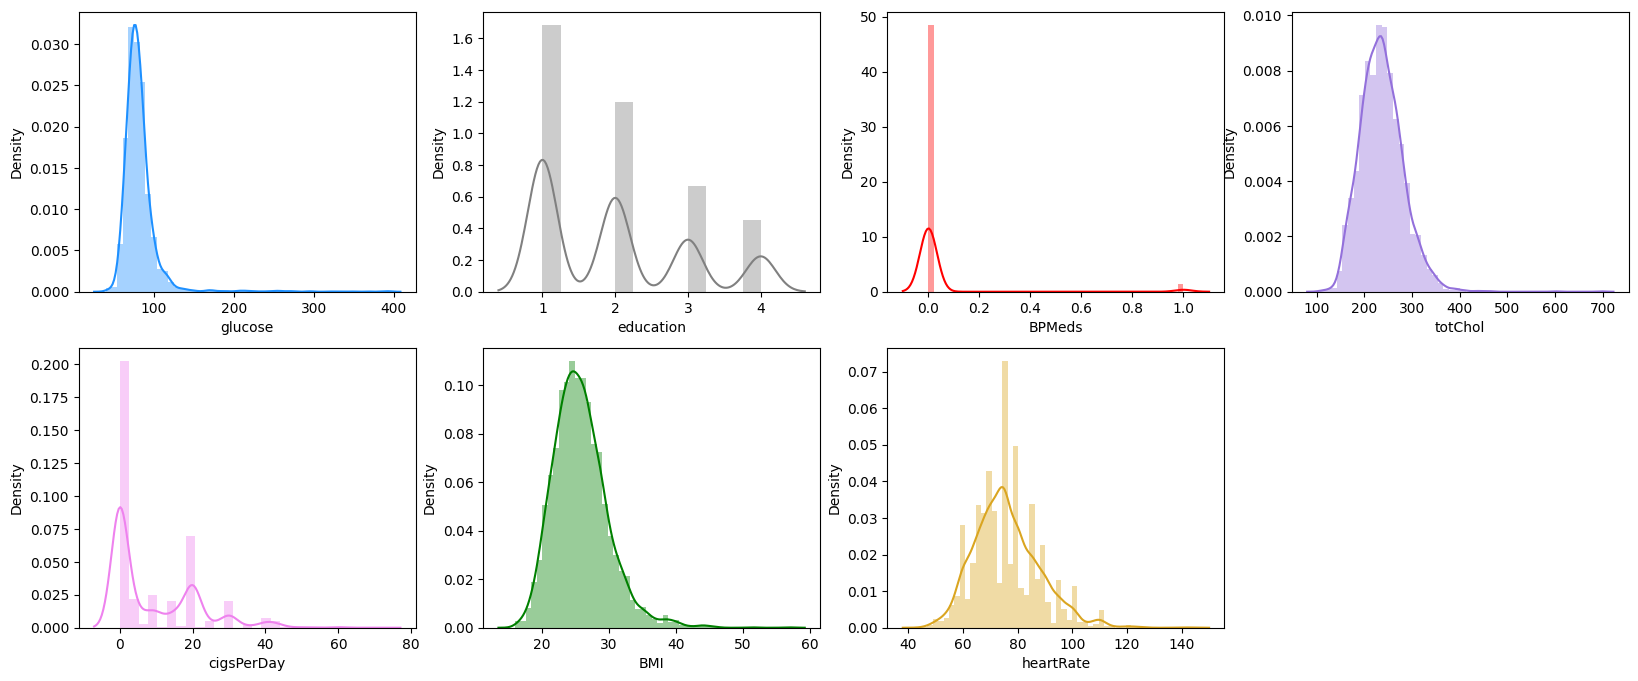

In [27]:
# Plotting the frequency distribution plot for checking the distribution of each feature that contains null values
plt.figure(figsize=(20,8))
colour= ['dodgerblue','grey','red','mediumpurple','violet','green','goldenrod','lime']
for i,j in zip(null_list, colour):
  ax= plt.subplot(2,4,null_list.index(i)+1)
  sns.distplot(df[i],color=j)
plt.show()



We know that:

Mean is used when we have normal distributed data and do not contain any outlier.
Median is used when the data is numerical, continous and contains extreme values (outliers).
Mode is used when the data is categorical in nature.
By checking the outliers and distribution of the data we are going to impute the null values of:

"glucose" -> Median

"education" -> Mode

"BPMeds" -> Mode

"totChol" -> Median

"cigsPerDay" -> Median

"BMI" -> Median

"heartRate" -> Median

In [28]:
# Filling up the NaN values of each feature
df['glucose'].fillna(df['glucose'].mean(), inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace=True)
df['totChol'].fillna(df['totChol'].median(), inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['heartRate'].fillna(df['heartRate'].median(), inplace=True)

In [29]:
df['cigsPerDay'].mean()

9.069477434679335

In [30]:
# Rechecking the null values in the dataset after imputing with different statistical values
df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

###What all manipulations have you done and insights you found?



1.   We have replaced null values from glucose, totChol,BMI and heartRate withmedian as they are containing high amount of outliers. 
2.  Null values from categorical features like Education and BPmeds are replaced with mode.

1.  As CigsPerDay feature is having median value as zero and contains less number of outliers We have replaced null values within it with mean.













## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [31]:
# Separating the categorical and continous variable and storing them into different lists (excluding 'id')
categorical_variable=[]
continous_variable=[]

for i in df.columns:
  if i == 'id':
    pass
  elif df[i].nunique() <10:
    categorical_variable.append(i)
  elif df[i].nunique() >= 10:
    continous_variable.append(i)

In [32]:

# Checking the definded lists
print(categorical_variable)
print(continous_variable)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


**Univariate Analysis**


#### Chart - 1(Histogram of all variable)

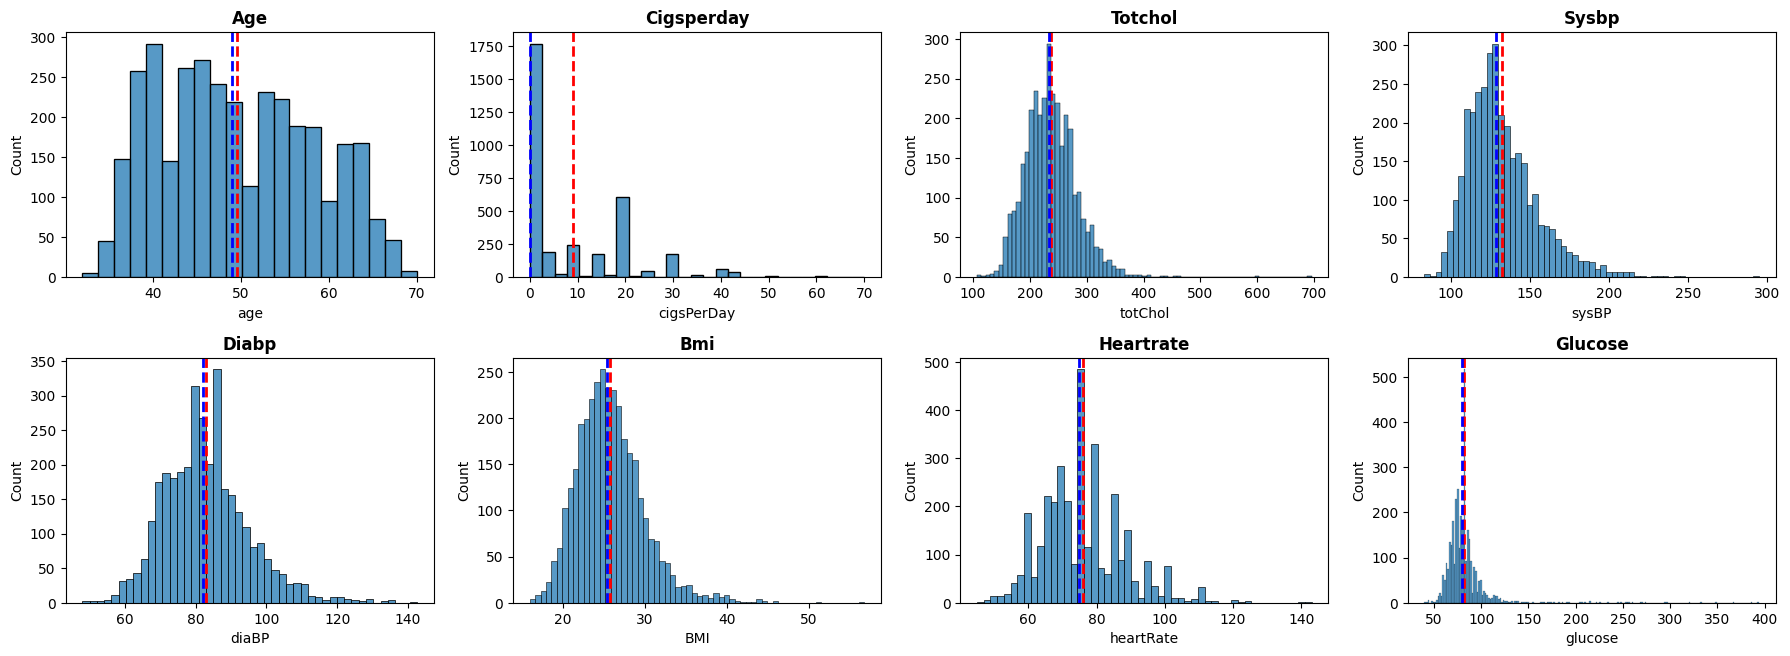

In [34]:
# Chart - 1 visualization code
# Visualizing the mean and median.
plt.figure(figsize=(18,16))
for n,column in enumerate(continous_variable):
  feature = df[column]
  ax=plt.subplot(5, 4, n+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()
     

##### 1. Why did you pick the specific chart?

A histogram is a way to show how frequently different values occur in a set of data. It uses bars to represent different groups of values, with the height of each bar showing how many values fall into that group. It's a useful tool for understanding patterns in data, like how spread out the values are or where the most common values are located.

##### 2. What is/are the insight(s) found from the chart?



*   Based on the histogram analysis of the dataset, it was found that the age of the majority of the individuals falls between the range of 40-60 years old. However, there are a few individuals in the dataset who are younger than 30 or older than 70.

*   In terms of smoking habits, most of the individuals in the dataset smoke less than 10 cigarettes per day, while a few individuals smoke more than 20 cigarettes per day.

* The histogram of the total cholesterol levels shows that the majority of individuals have levels between 200-250 mg/dL, with some individuals having levels lower than 160 mg/dL or higher than 300 mg/dL.

* Regarding blood pressure, the majority of individuals have systolic blood pressure levels between 120-140 mmHg, with a few individuals having levels lower than 90 mmHg or higher than 160 mmHg. Similarly, the majority of individuals have diastolic blood pressure levels between 80-90 mmHg, with a few individuals having levels below 60 mmHg or above 100 mmHg.

*   In terms of body mass index, the majority of individuals have a BMI between 24-26, while a few individuals have a BMI below 18 or above 35.

*   The histogram of heart rate shows that the majority of individuals have a heart rate between 60-90 beats per minute, while a few individuals have a heart rate below 50 beats per minute or above 100 beats per minute.

* Finally, the histogram of blood glucose levels indicates that most individuals have levels between 70-90 mg/dL, while a few individuals have levels below 60 mg/dL or above 130 mg/dL.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2(Distribution of categorical features))

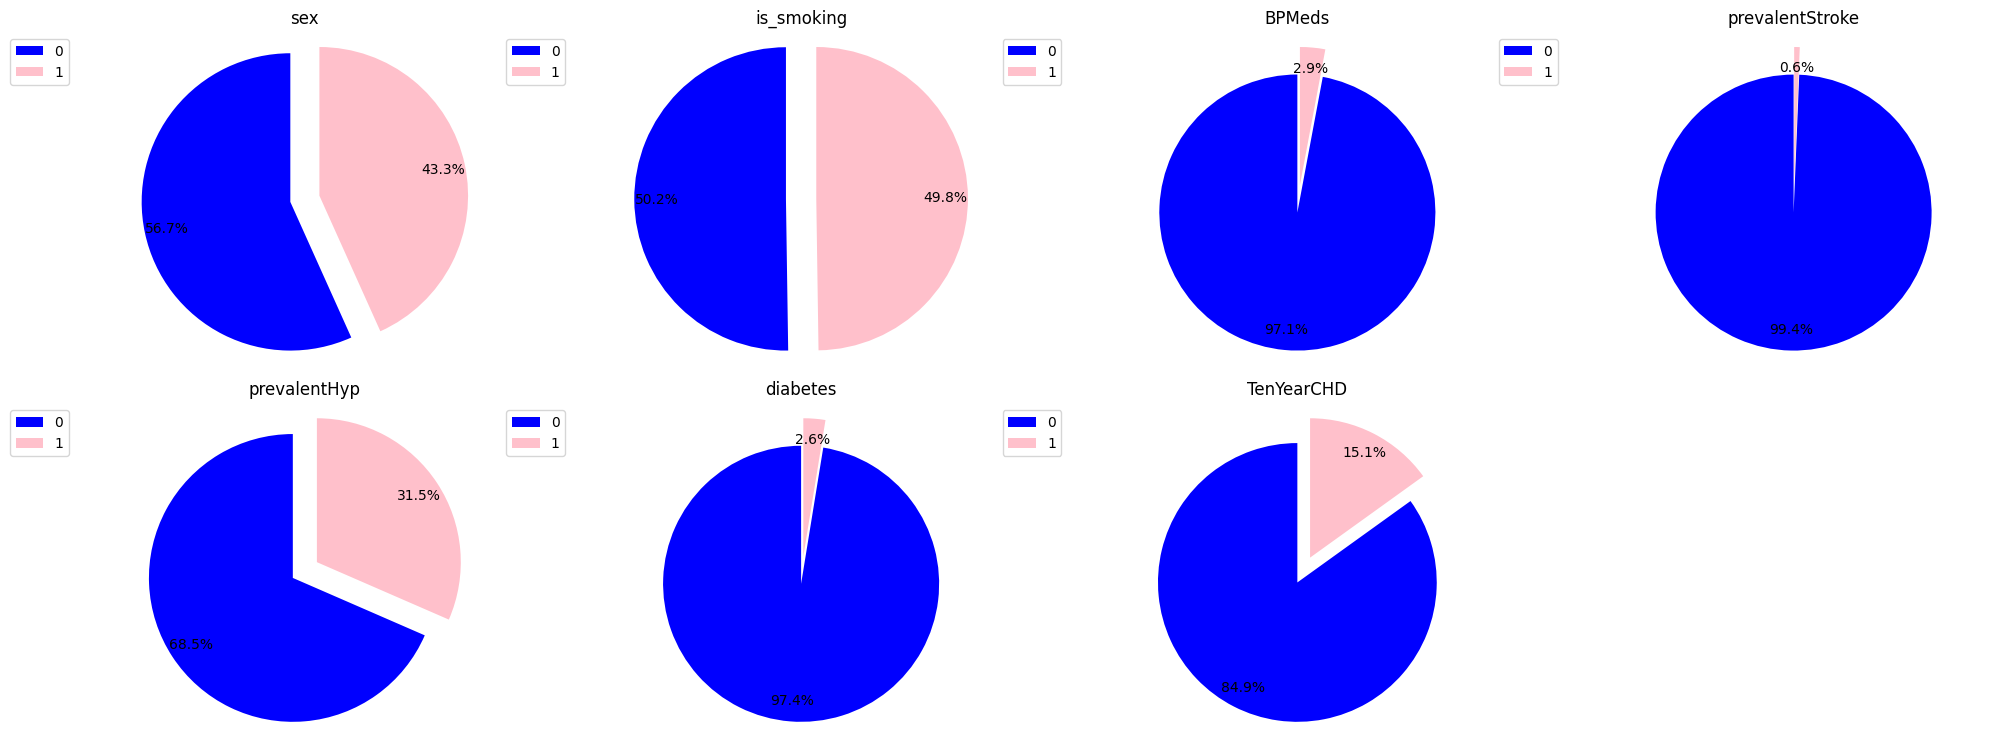

In [38]:
# Chart - 2 visualization code

plt.figure(figsize=(20,15))
labels = '0', '1'
colors = ['blue', 'pink']
explode = [0, 0.2]
for i, j in enumerate(categorical_variable[1:]):
    plt.subplot(4, 4, i+1)
    data = df[j].value_counts()
    plt.pie(data, explode=explode, colors=colors, startangle=90, autopct='%1.1f%%', pctdistance=0.85)
    plt.legend(labels, loc='upper right', bbox_to_anchor=(-0.1, 1))
    plt.title(j)
    plt.axis('equal')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The code creates pie charts to show how different groups compare in a dataset. Pie charts are used to display different parts of a whole. In this case, the parts are different categories or groups in the data. The code is creating a separate pie chart for each category and labeling them so you can see how much of the whole each category represents.

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from the pie charts are as follows:

1. Among the individuals in the dataset, 56.7% are female and the remaining 43.3% are male.

2. Approximately 50.24% of the individuals in the dataset are smokers.

3. Only 2.9% of the individuals in the dataset take blood pressure medicines.

4. 0.6% of the individuals in the dataset have a history of strokes, while 31.5% have a history of hypertension.

5. 2.6% of the individuals in the dataset have diabetes.

6. 15.1% of the individuals in the dataset have a chance of getting heart diseases in ten years.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3 (Distribution of Education levels)

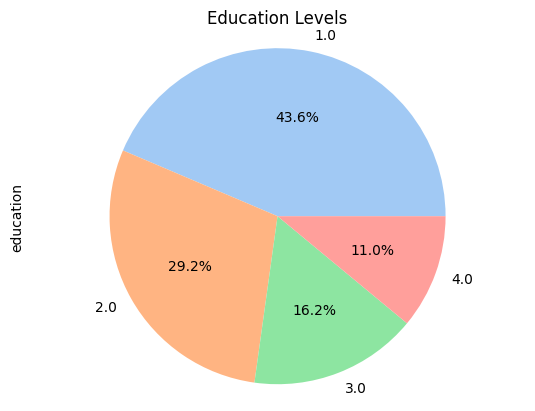

In [41]:
# Chart - 3 visualization code
# count values for education variable
edu_counts = df['education'].value_counts()

# create a pie chart using Pandas
edu_counts.plot(kind='pie', colors=sns.color_palette('pastel'), autopct='%1.1f%%')
plt.title('Education Levels')
plt.axis('equal')

# display the chart
plt.show()




##### 1. Why did you pick the specific chart?

The pie chart is a good choice for representing categorical data with a few distinct categories. In this case, the variable being visualized is "education" which has a limited number of discrete values. Pie charts can effectively show the proportion of each category in relation to the whole, making it easy to quickly compare the sizes of each category. Additionally, the use of colors and labels can help make the chart more visually appealing and easy to understand.

##### 2. What is/are the insight(s) found from the chart?

The pie chart shows the distribution of education levels in a dataset, and the insights that can be drawn are that the majority of the population have Education Level - 1 with 43.6%, while the least education level is 4 with 11.0%. This means that the dataset has a higher proportion of individuals with lower education levels, and fewer individuals with higher education levels.

Bivariate Analysis

#### Chart - 4((Repression plot of feature vs TenYearCHD)

In [42]:
# Lets make a copy of original dataframe and make all features numeric in order to visualize them properly
df_copied= df.copy()

In [43]:
# Defining a label encoder based on above data
encoder = {'sex':{'M':1, 'F':0},'is_smoking':{'YES':1, 'NO': 0}}

# Label Encoding
df_copied = df_copied.replace(encoder)

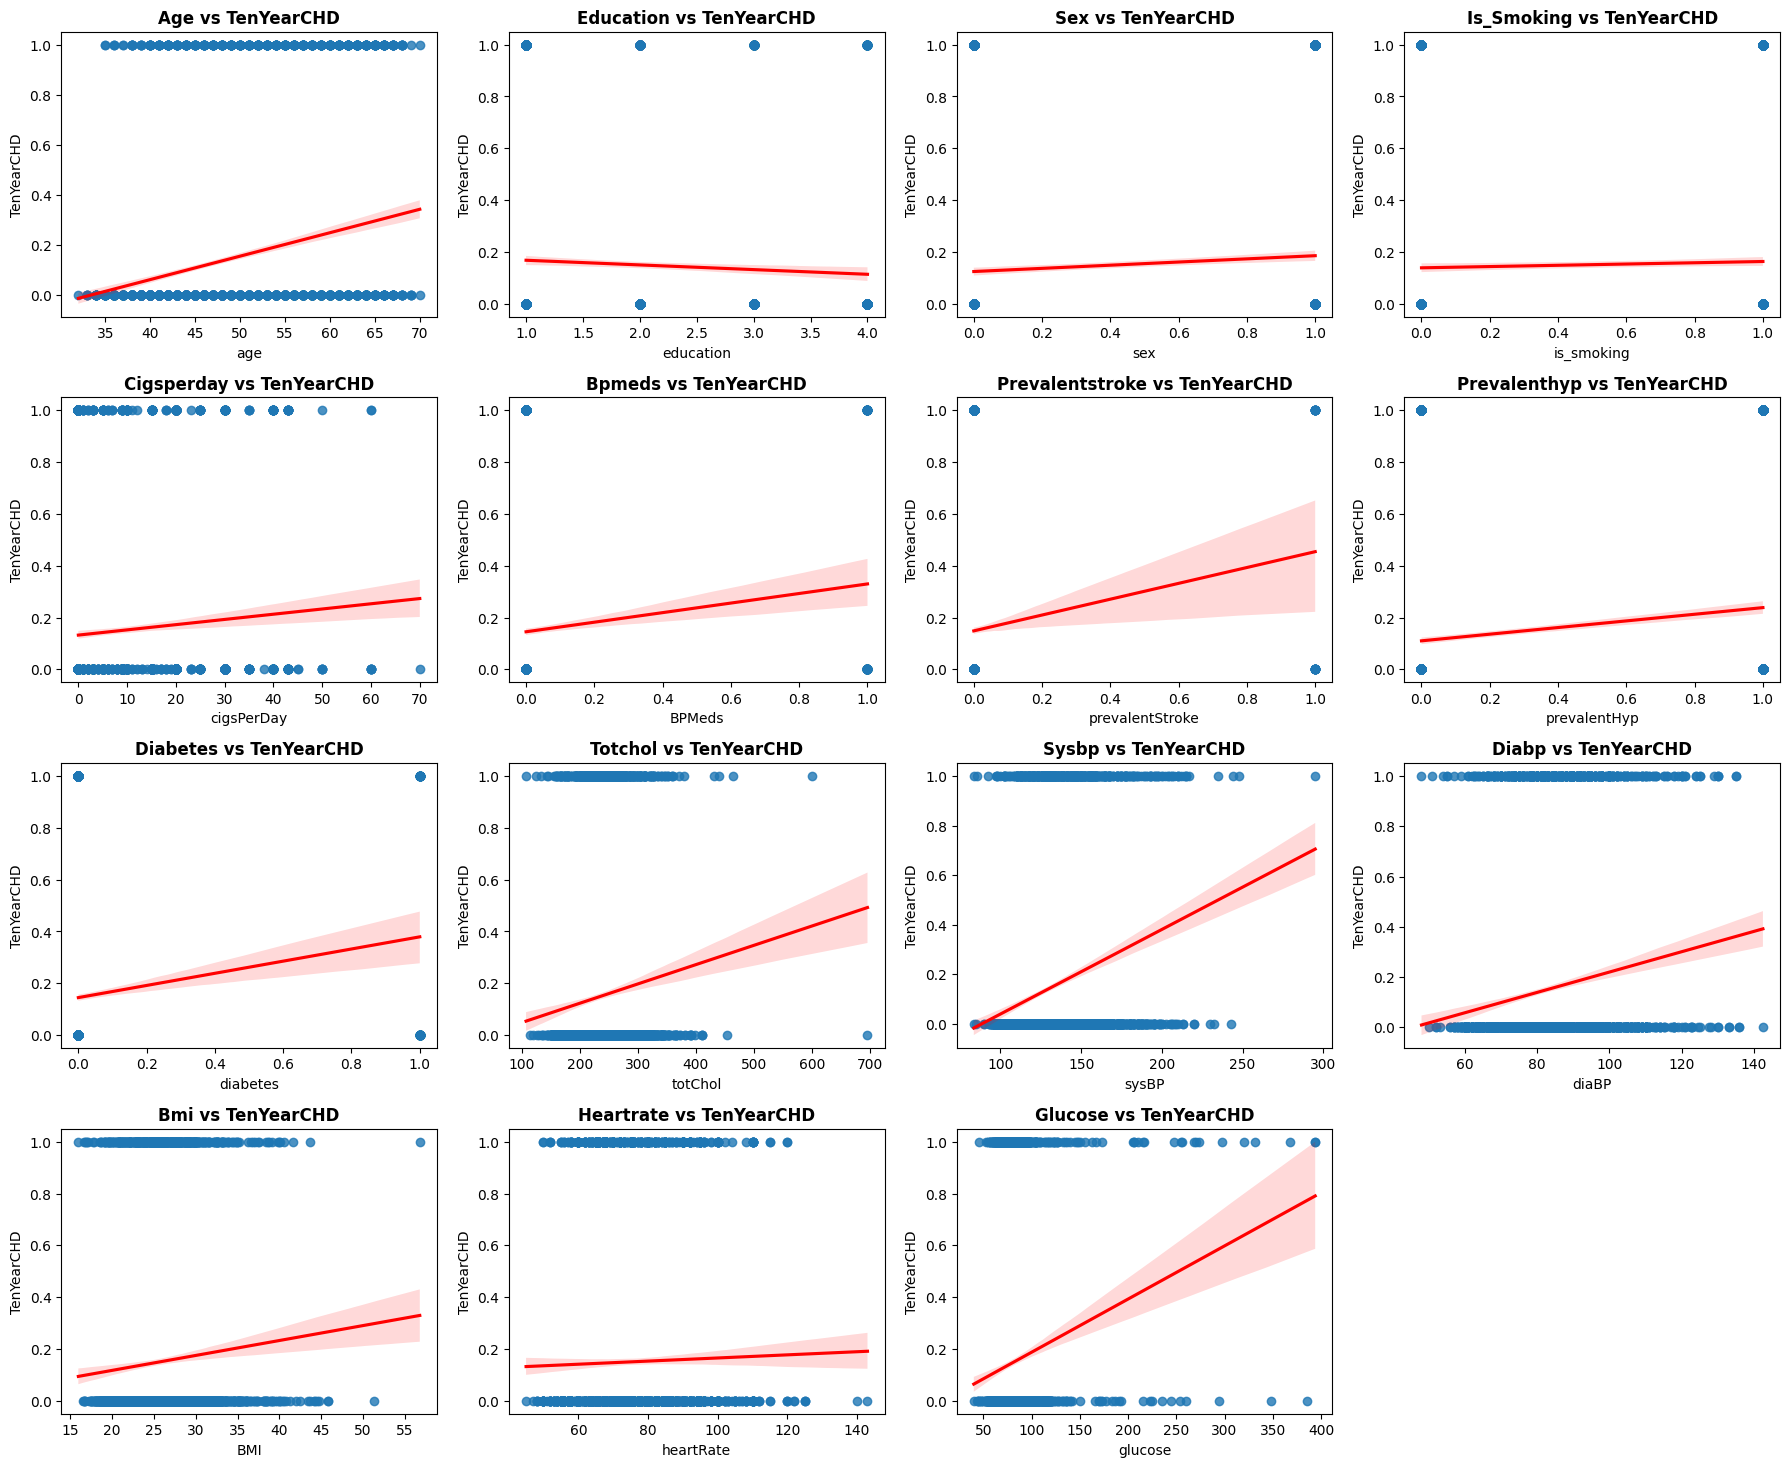

In [45]:
# Chart - 4 visualization code
plt.figure(figsize=(18, 18))
for i, feature in enumerate(df.columns[:-1]):
    ax = plt.subplot(5, 4, i+1)
    sns.regplot(x=feature, y='TenYearCHD', data=df_copied, ax=ax, line_kws={"color": "red"})
    ax.set_title(f'{feature.title()} vs TenYearCHD', weight='bold')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The scatter plot with regression line is a good choice to visualize the relationship between two continuous variables. In this case, the plot shows the relationship between each risk factor (e.g. age, BMI, etc.) and the TenYearCHD variable, which is a binary outcome (0 or 1) indicating whether the individual developed coronary heart disease in the next 10 years or not. The regression line can help to identify any trends or patterns in the data and show the direction of the relationship between the variables.

##### 2. What is/are the insight(s) found from the chart?

Following features have a positive relation with TenYearCHD :-

Age

Sex

CigsPerDay

BPMeds

prevalentStroke

prevalentHYP

Diabetes

TotChol

sysBP

diaBP

BMI

Glucose

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact as they provide valuable information regarding the factors that have a positive correlation with the TenYearCHD. This information can be used to identify high-risk individuals and develop targeted prevention and treatment strategies.

#### Chart - 5((Countplot of categorical features with target variable)

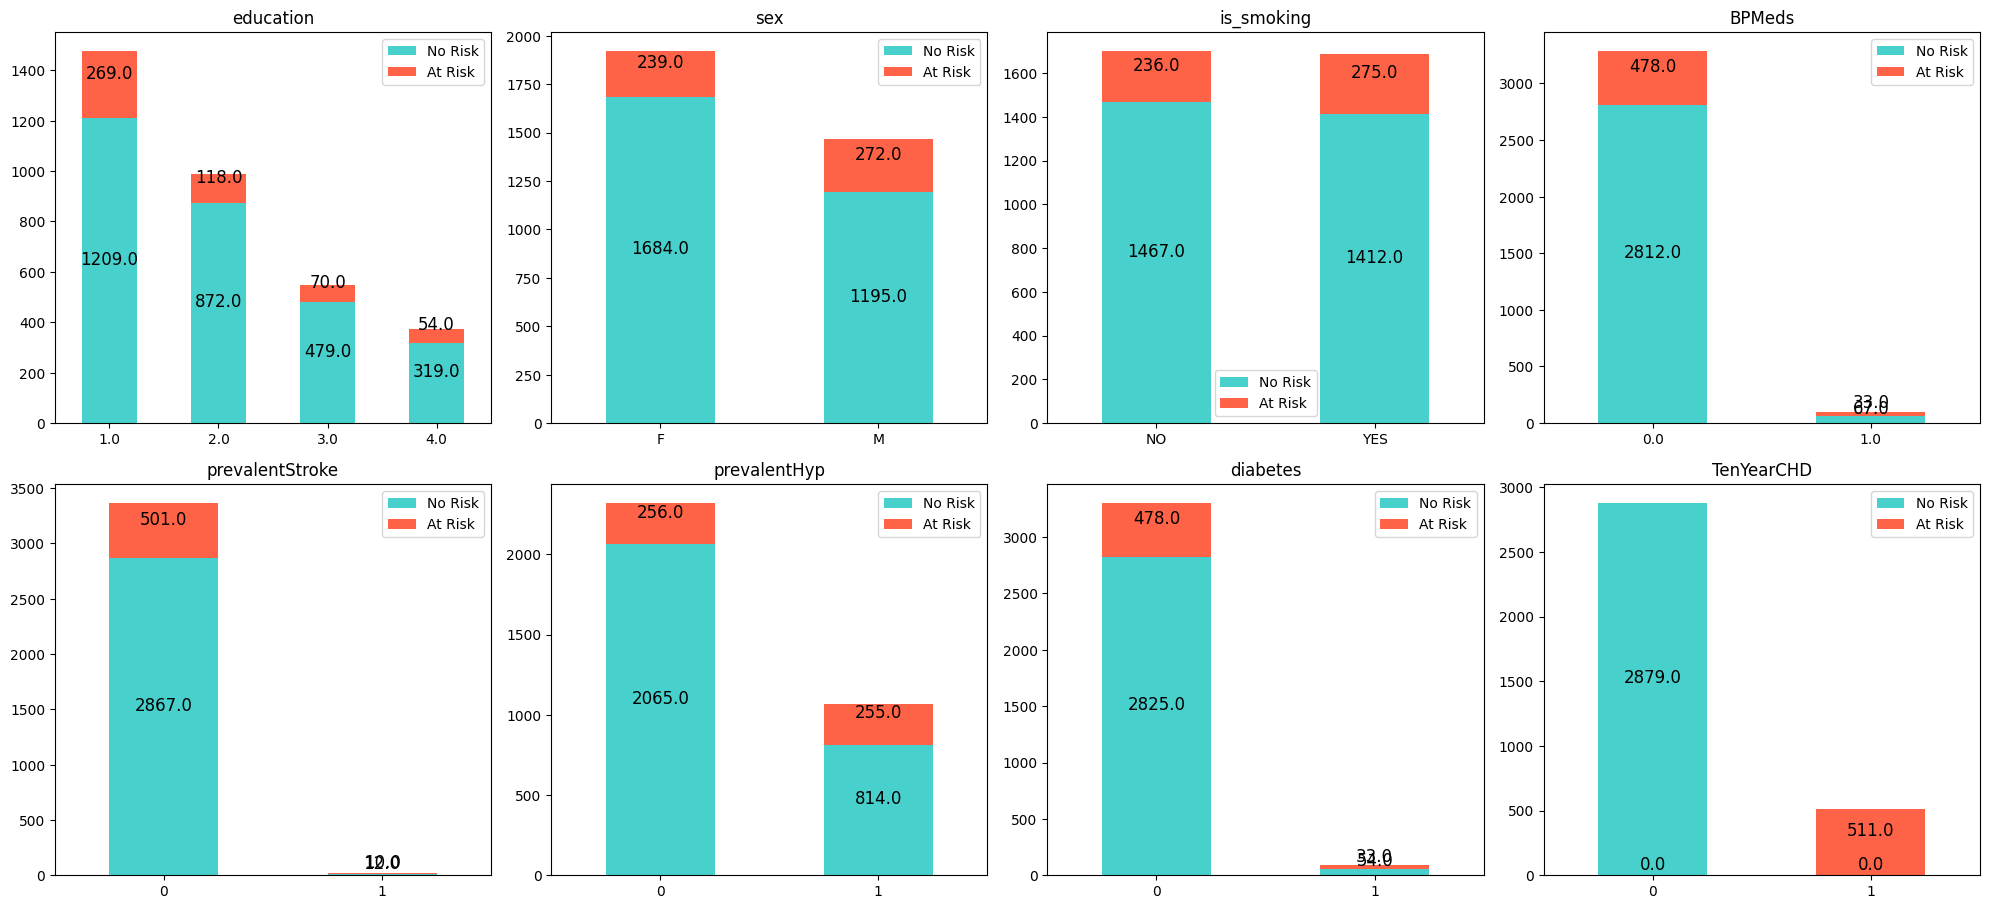

In [48]:
# Chart - 5 visualization code
plt.figure(figsize=(20,18))
for i, j in enumerate(categorical_variable):
    plt.subplot(4, 4, i+1)
    ct = pd.crosstab(df[j], df['TenYearCHD'])
    ct.plot(kind='bar', stacked=True, color=['mediumturquoise', 'tomato'], ax=plt.gca())
    plt.title(j)
    plt.xlabel('')
    plt.legend(['No Risk', 'At Risk'])
    plt.xticks(rotation=0)
    for bar in plt.gca().patches:
        plt.gca().annotate(bar.get_height(), 
                           (bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2),
                           ha='center', va='center', size=12, xytext=(0, 8),
                           textcoords='offset points')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The specific chart used is a countplot with hue, which helps to visualize the count of different categorical variables while also differentiating between the values of the TenYearCHD column. This is a useful chart for exploring the relationship between the categorical variables and the target variable, and it can help to identify which categories have a higher or lower risk of developing heart disease.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the count plots:

- BP Problems, prevalent strokes, prevalent hypertension, and diabetes have a significant impact on the likelihood of getting heart diseases.

- Individuals at education Level-1 have a slightly higher percentage of getting suffered from CHD compared to other education levels.

- Males are more prone to CHD than females.

- Smokers have a slightly higher chance of suffering from CHD than non-smokers.

- Patients who are not on BP medication have minimal chances compared to medicated patients of suffering from CHD.

- Patients who have a history of stroke or hypertension and diabetes are more prone to CHD.

Multivariate Analysis

#### Chart - 6(Relation between Sex and CigsPerDAY with TenYearCHD)

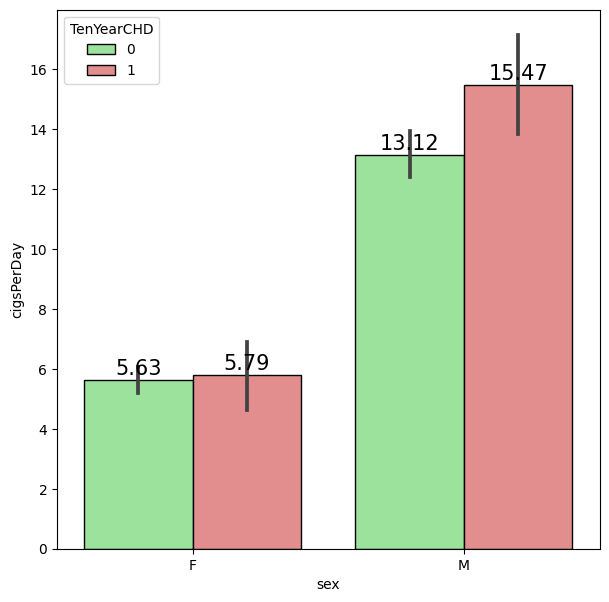

In [49]:
# Chart - 6 visualization code
plt.figure(figsize=(7,7))
plots=sns.barplot(x='sex', y='cigsPerDay', hue='TenYearCHD', data=df, palette=["lightgreen","lightcoral"], edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()


##### 1. Why did you pick the specific chart?

This chart shows the average number of cigarettes smoked per day for males and females in the dataset, and also indicates if they are at risk for heart disease or not. The bars represent the average number of cigarettes smoked, and the colors indicate the risk for heart disease. The green color represents no risk, and the red color represents at risk. The chart helps us understand the relationship between smoking and the risk of heart disease for males and females.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the chart in points:

- The chart shows the number of cigarettes smoked per day by males and females, along with the risk of TenYearCHD (Ten-Year Risk of Developing Coronary Heart Disease).

- The majority of individuals who smoke cigarettes are males.

- Males who smoke more cigarettes have a higher risk of TenYearCHD than females who smoke.

- For females, the risk of TenYearCHD does not seem to be affected by whether or not they smoke cigarettes.

- Overall, the chart suggests that smoking is a risk factor for TenYearCHD, particularly for males who smoke more cigarettes per day.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help create a positive business impact by identifying the key factors that contribute to heart diseases. This can help businesses, especially those in the healthcare industry, to develop targeted prevention and treatment strategies for patients with high risk factors. For example, a healthcare company can develop programs to promote healthy lifestyle choices and regular checkups for patients with high blood pressure, diabetes, or a history of stroke.

#### Chart - 7(Are glucose level impacted by CHD and Diabetes?)

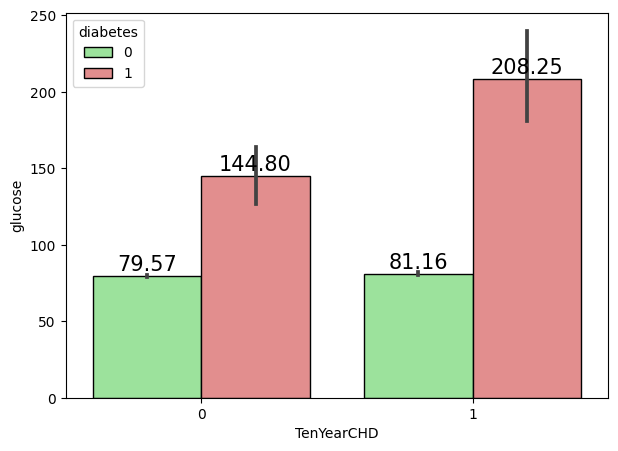

In [54]:
# Chart - 7 visualization code

plt.figure(figsize=(7,5))
plots=sns.barplot(x=df['TenYearCHD'],y=df['glucose'],hue=df['diabetes'],edgecolor='black', palette=["lightgreen","lightcoral"])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

          



##### 1. Why did you pick the specific chart?

I picked this specific chart because it shows the relationship between the target variable (TenYearCHD) and the feature "glucose" with respect to the presence of diabetes. The use of different colors for diabetes and non-diabetes categories helps in easy visualization of the impact of glucose levels on the risk of heart disease over different categories of diabetes.

##### 2. What is/are the insight(s) found from the chart?

The insights from the chart are:

- Higher glucose levels are positively correlated with the risk of developing heart diseases. This implies that people with diabetes or high glucose levels have a higher risk of developing cardiovascular disease.
- Diabetic patients have a higher chance of developing heart diseases than non-diabetic patients. Therefore, it is essential to manage glucose levels for diabetic patients to reduce the risk of developing cardiovascular disease.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


This plot shows that people with higher blood sugar levels have a greater risk of developing heart disease, especially those with diabetes. This information can help healthcare professionals and individuals take steps to manage blood sugar levels and reduce their risk of heart disease.

#### Chart - 8(Correlation Heatmap)

<Axes: >

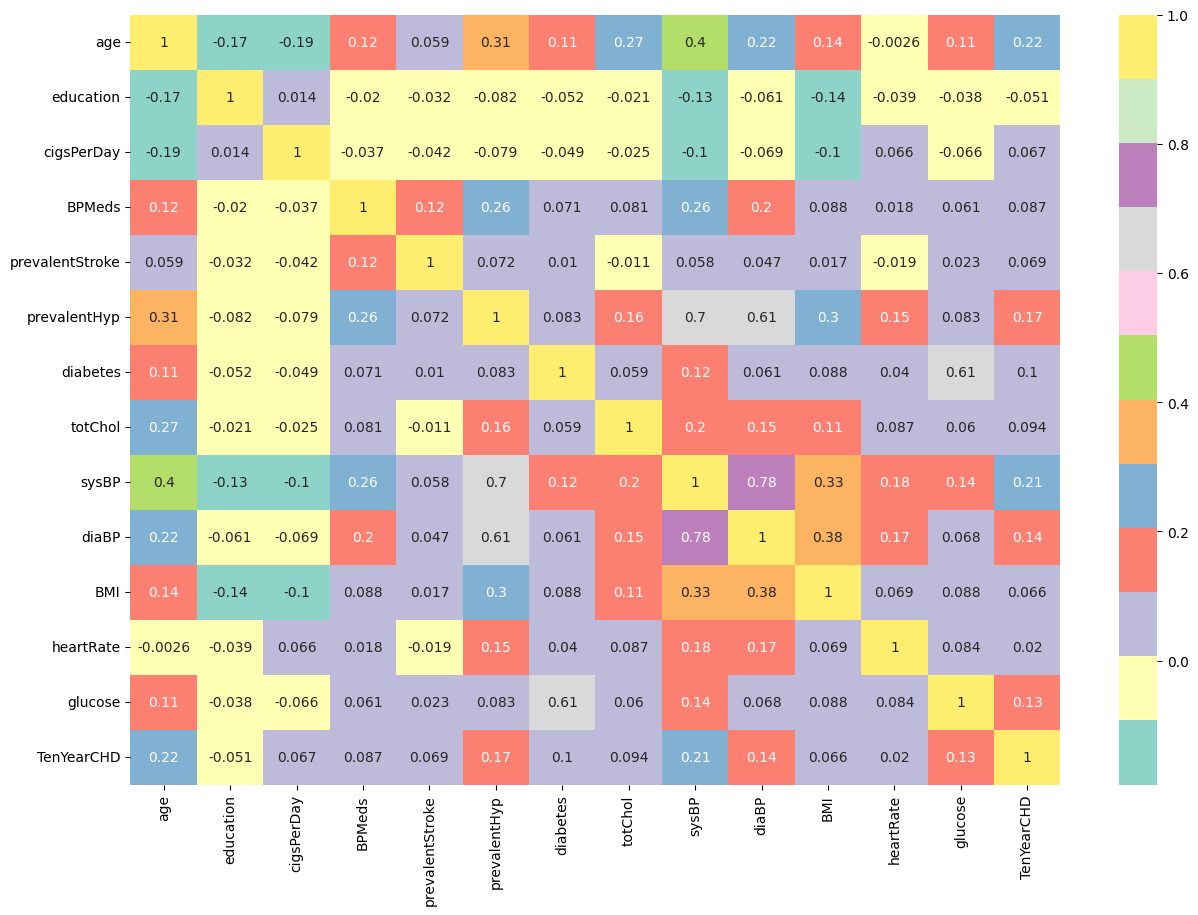

In [57]:
# Chart - 8 visualization code

# Correlation Heatmap visualization code
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap=sns.color_palette("Set3"))

##### 1. Why did you pick the specific chart?

The correlation heatmap is a useful chart to visualize the correlation between different variables in a dataset. It is a common practice to create a correlation heatmap to quickly identify the most important relationships in a dataset. 

By using this chart, we can easily see which variables are positively or negatively correlated with each other, and which ones have the highest or lowest correlation values. Therefore, it can help to identify the most important variables to focus on for further analysis and modeling.

##### 2. What is/are the insight(s) found from the chart?

We can see that following have strong correlation :

diaBP and sysBP

prevalentHyp and diaBP

prevalentHyp and sysBP

diabetes and glucose

Following have weak correlation :

glucose and cigPerDay
BMI and education , diaBP and education , sysBP and education , prevalentHyp and education , age and education
BMI and cigPerDay , diaBP and cigPerDay , sysBP and cigPerDay , prevalentHyp and cigPerDay , age and cigPerDay

#### Chart - 9 - Pair Plot 

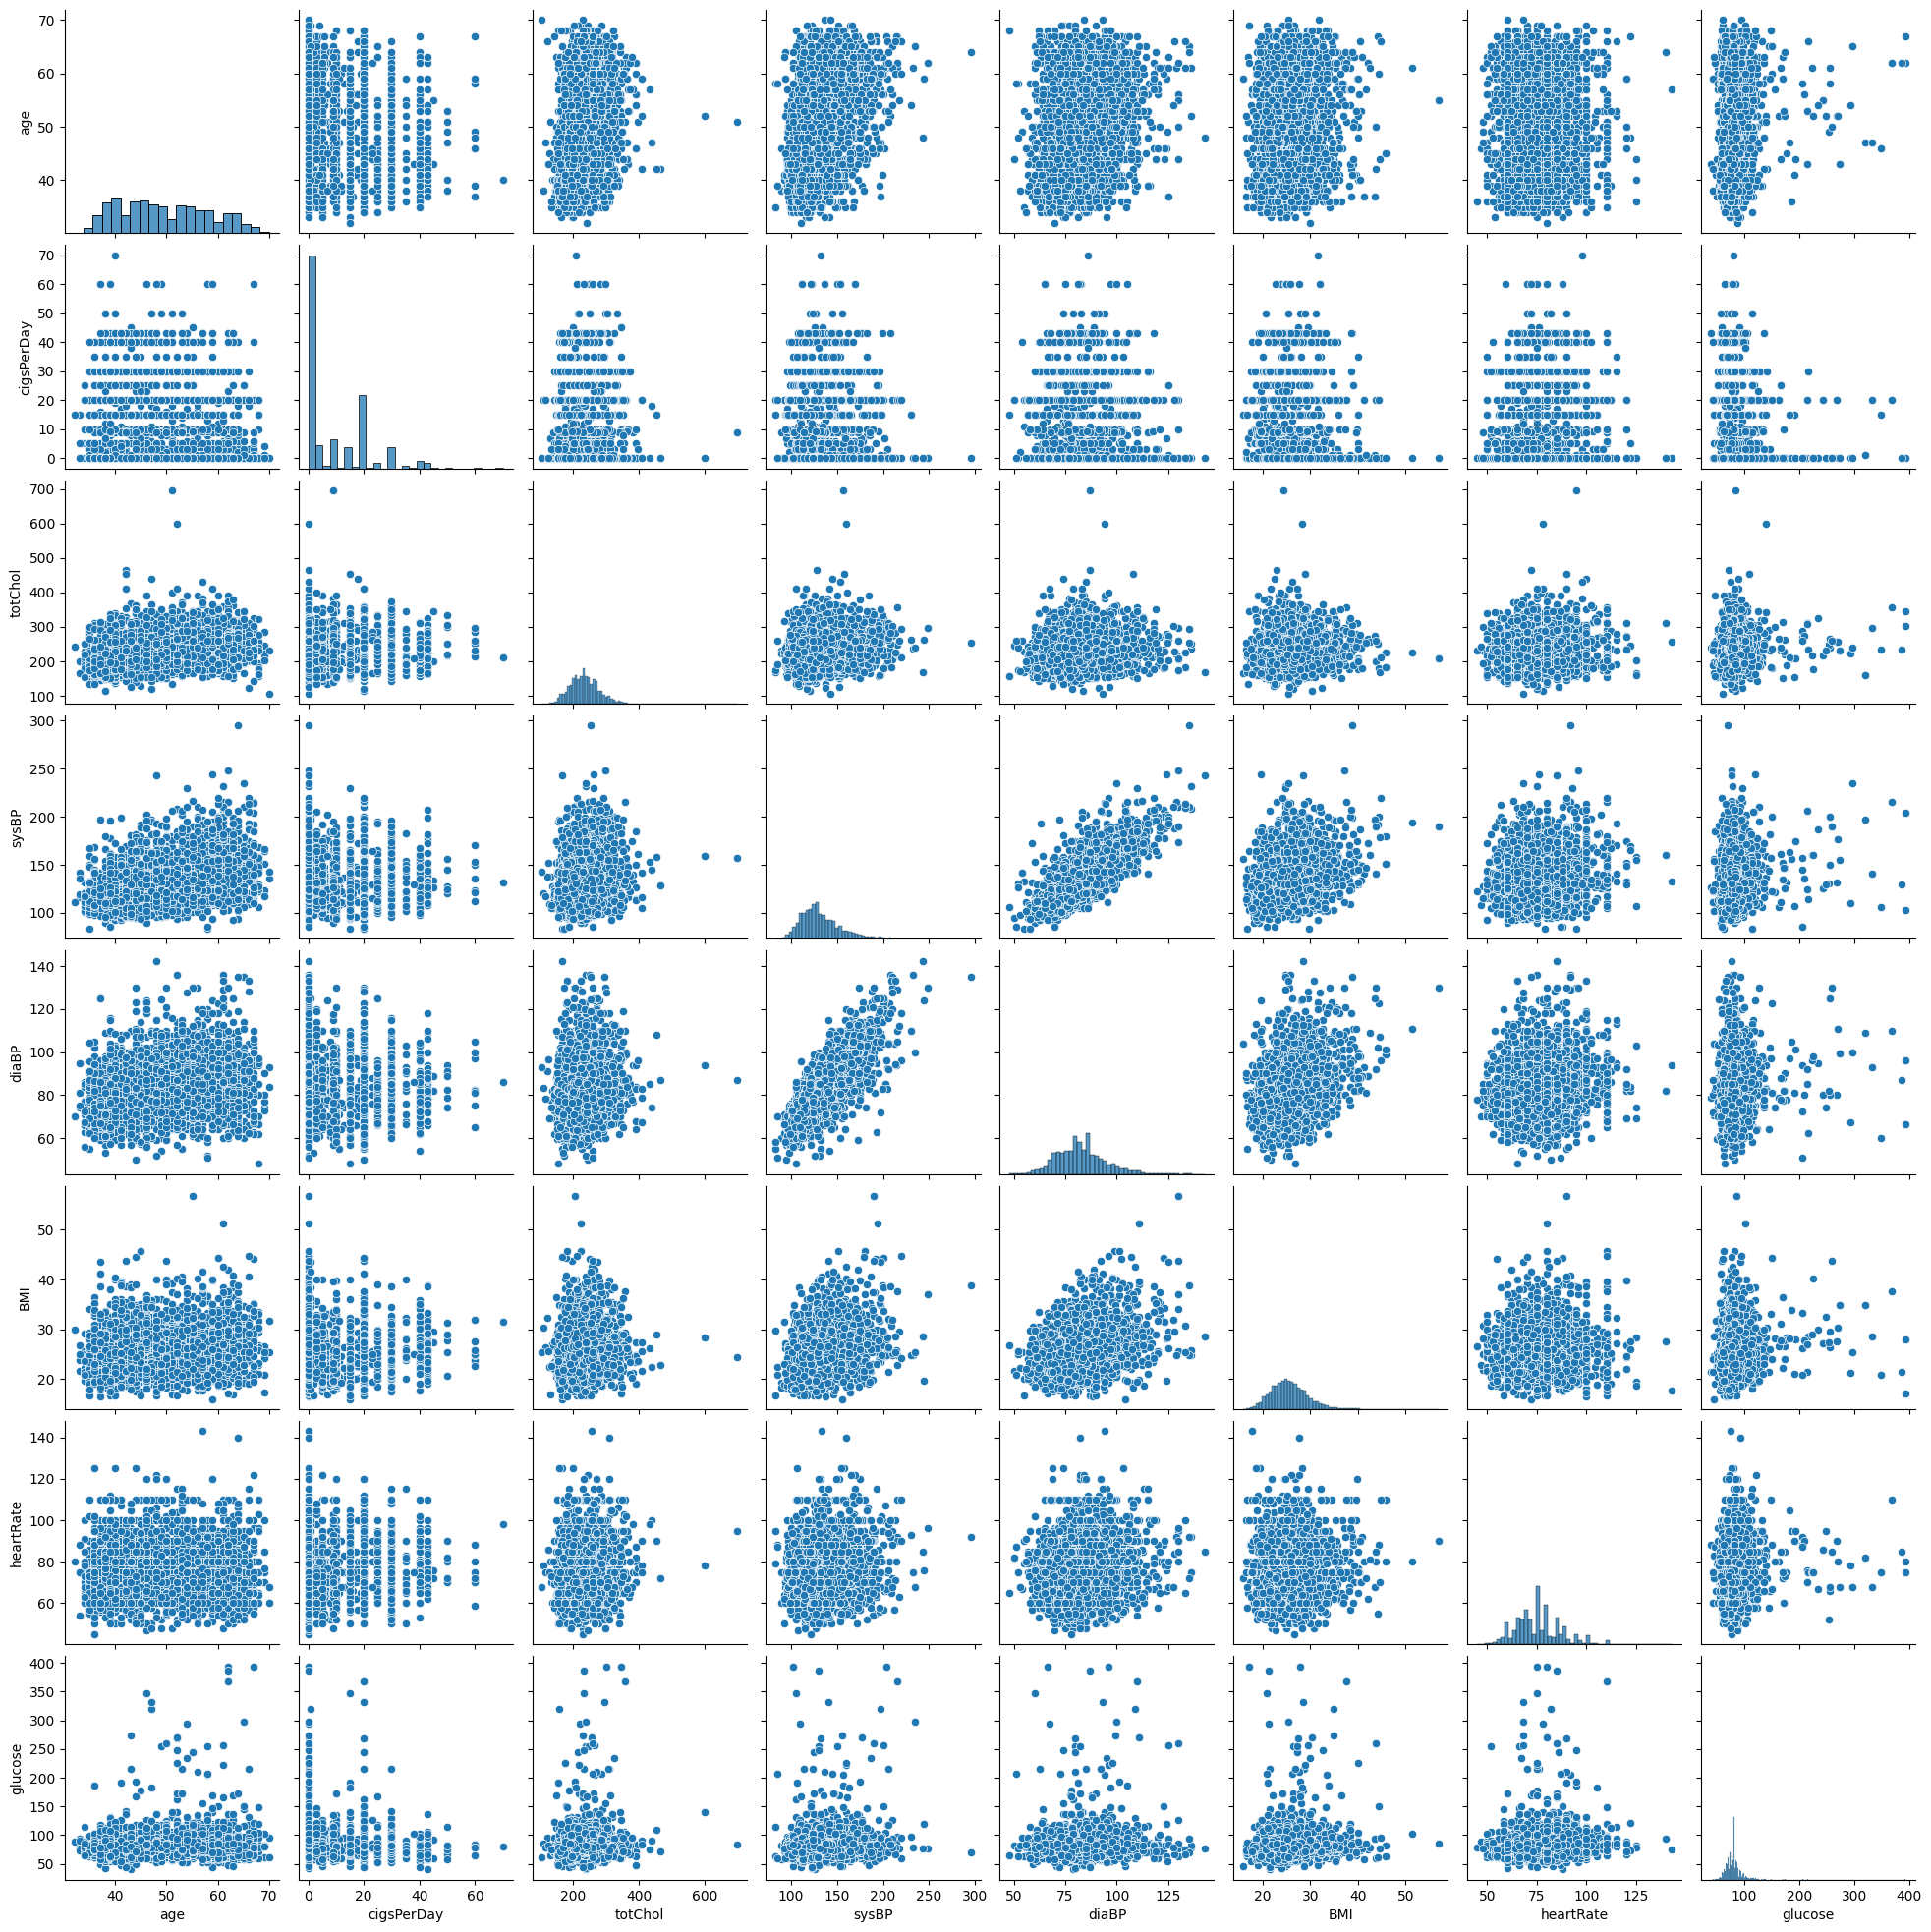

In [58]:
# Pair Plot visualization code
sns.pairplot(df[continous_variable])

##### 1. Why did you pick the specific chart?

The pair plot is a useful chart for visualizing the relationships between all the continuous variables in the dataset.Hence, it can provide us with a comprehensive understanding of the dataset's continuous variable relationships.

###**Hurrah!  Successfully completed your EDA Capstone Project !!!**